In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv("concrete.csv",header=None)


In [39]:
data.head()

,0,1,2,3,4,5,6,7,8
0,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1,141.3,212,0,203.5,0,971.8,748.5,28,29.89
2,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
3,250,0,95.7,187.4,5.5,956.9,861.2,28,29.22
4,266,114,0,228,0,932,670,28,45.85


In [40]:
data.drop(0,inplace=True)

In [41]:
data.head()

,0,1,2,3,4,5,6,7,8
1,141.3,212,0,203.5,0,971.8,748.5,28,29.89
2,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
3,250,0,95.7,187.4,5.5,956.9,861.2,28,29.22
4,266,114,0,228,0,932,670,28,45.85
5,154.8,183.4,0,193.3,9.1,1047.4,696.7,28,18.29


In [42]:
data=data.reset_index().drop("index",axis=1)

In [43]:
data.head()

,0,1,2,3,4,5,6,7,8
0,141.3,212,0,203.5,0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250,0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266,114,0,228,0,932,670,28,45.85
4,154.8,183.4,0,193.3,9.1,1047.4,696.7,28,18.29


In [59]:
data1=data[8]

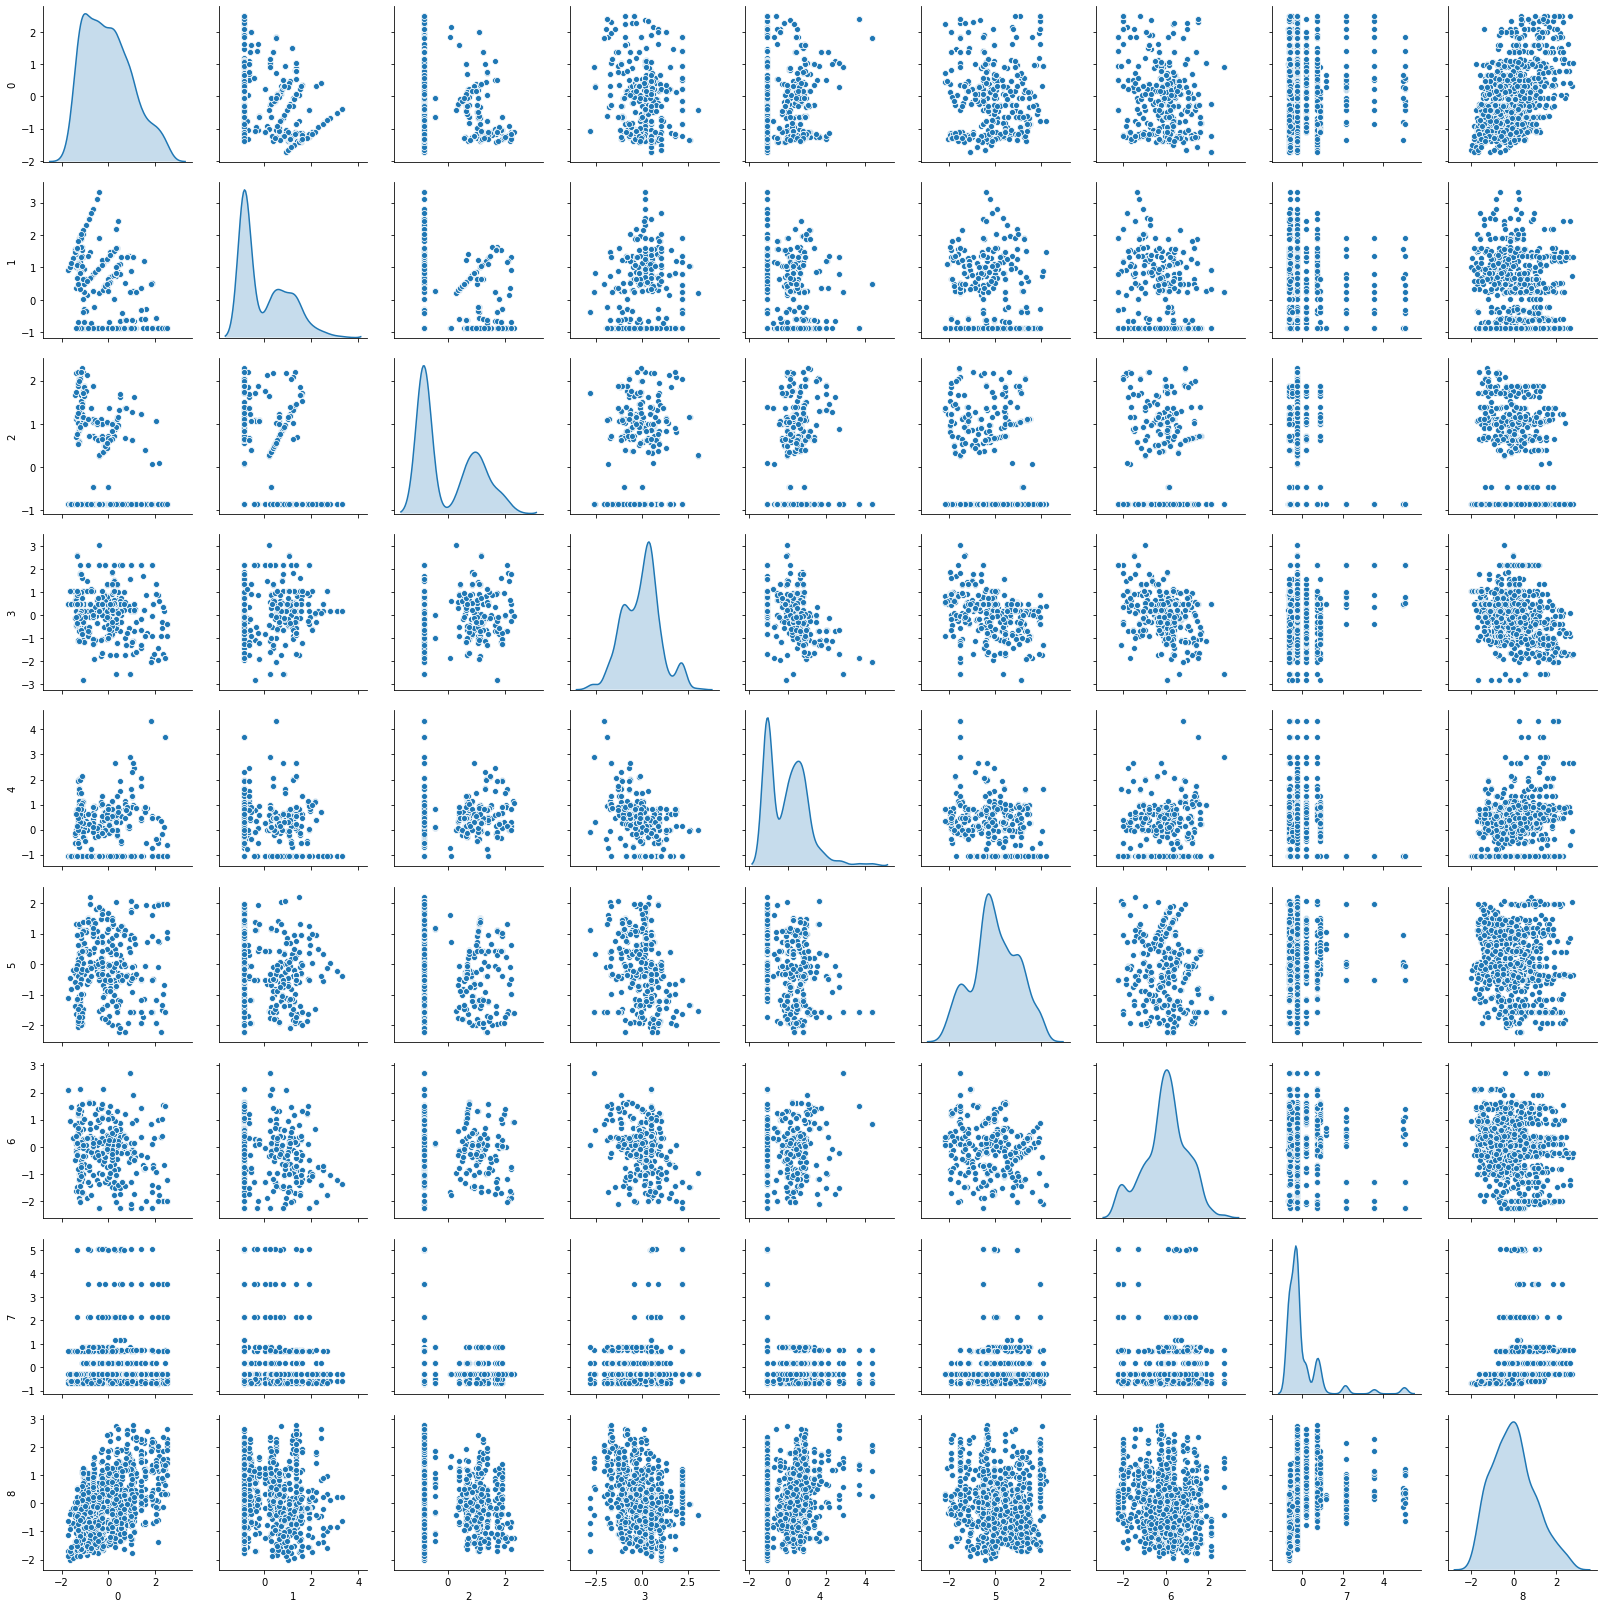

In [64]:
sns.pairplot(xsc,diag_kind="kde")

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
xsc=pd.DataFrame(sc.fit_transform(data))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [46]:
xdata=xsc.drop(8,axis=1)

In [47]:
ydata=xsc[8]

In [48]:
xdata.head()

,0,1,2,3,4,5,6,7
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [50]:
from sklearn.model_selection import train_test_split


In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.20,random_state=2)     # 0.30 or 30% is the size of test

In [109]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
ypred=lr.predict(xtest)

In [111]:
from sklearn.metrics import r2_score, mean_squared_error


In [112]:
r2_score(ytest,ypred)

0.6881335032057952

In [65]:
from sklearn.decomposition import PCA


In [66]:
cov_matrix = np.cov(xsc.T)


In [67]:
cov_matrix

array([[ 1.00097182, -0.27548337, -0.39785361, -0.08166604,  0.09247596,
        -0.10945526, -0.22293429,  0.08202566,  0.49831572],
       [-0.27548337,  1.00097182, -0.32389436,  0.10735626,  0.04331247,
        -0.28427461, -0.28187634, -0.04428902,  0.13496029],
       [-0.39785361, -0.32389436,  1.00097182, -0.25723376,  0.37787001,
        -0.00997051,  0.07918537, -0.15452054, -0.10585769],
       [-0.08166604,  0.10735626, -0.25723376,  1.00097182, -0.65817191,
        -0.18247076, -0.45109913,  0.27788802, -0.28991486],
       [ 0.09247596,  0.04331247,  0.37787001, -0.65817191,  1.00097182,
        -0.26625765,  0.22290765, -0.1928873 ,  0.36643459],
       [-0.10945526, -0.28427461, -0.00997051, -0.18247076, -0.26625765,
         1.00097182, -0.17865441, -0.00301881, -0.1650949 ],
       [-0.22293429, -0.28187634,  0.07918537, -0.45109913,  0.22290765,
        -0.17865441,  1.00097182, -0.1562464 , -0.16740378],
       [ 0.08202566, -0.04428902, -0.15452054,  0.27788802, -0

In [68]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [69]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 4.13267471e-02 -5.36485954e-01 -4.72559364e-01  2.98253891e-01
  -1.33851817e-01 -3.59693365e-01  3.89824821e-01 -3.09813343e-01
  -5.44413593e-02]
 [ 1.63042739e-01 -1.36147699e-01 -4.51184668e-01  2.28769298e-01
   4.94798767e-03  6.99055619e-01 -2.70156315e-01  7.59934879e-02
  -3.62650227e-01]
 [-3.69899564e-01  2.68270482e-01 -3.86431831e-01  2.55347236e-01
   2.47325097e-01 -1.98043268e-02  3.20385015e-01  6.00689663e-01
   2.27237640e-01]
 [ 5.64021863e-01  1.18457734e-01 -3.56041055e-01 -5.85652817e-01
  -1.00896687e-02  1.20189288e-01  3.06016015e-01  4.72149236e-02
   2.96091761e-01]
 [-5.36018387e-01 -2.48248754e-01 -5.28466889e-02 -4.47332284e-01
  -6.14074852e-01  1.87966815e-01  8.26508492e-02  1.65929475e-01
  -3.70769171e-02]
 [ 6.02738613e-02  2.24761035e-01 -3.37167625e-01 -2.42939734e-01
  -5.96959024e-02 -5.49480030e-01 -3.47660170e-01  2.21421137e-01
  -5.45674811e-01]
 [-3.81763152e-01  1.86860187e-01 -4.18692518e-01 -1.40389401e-01
   1.74760

In [113]:
x_xsc=xsc.drop(8,axis=1)

In [114]:
X_centered = x_xsc - x_xsc.mean(axis=0)

In [152]:
pca = PCA(n_components=6)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [153]:
X_pca = pca.transform(X_centered)

In [154]:
X_pca.shape

(1030, 6)

In [155]:
lr.fit(pca.transform(xtrain), ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
ypred1=lr.predict(pca.transform(xtest))

In [157]:
r2_score(ytest,ypred1)

0.6478361805481048